# MSDS600 Week 5 Assignment Starter - Rafael Fernandes

## Getting Ready

Loading the necessary libraries, dataset, and filters and checking if the data has any error.

In [5]:
import pandas as pd
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model, ClassificationExperiment
from IPython.display import Code

In [6]:
df = pd.read_csv('churn_data.csv', index_col='customerID')
df.head(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
9305-CDSKC,8,Yes,Month-to-month,Electronic check,99.65,820.50,Yes
1452-KIOVK,22,Yes,Month-to-month,Credit card (automatic),89.10,1949.40,No
6713-OKOMC,10,No,Month-to-month,Mailed check,29.75,301.90,No
7892-POOKP,28,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes


To use pycaret I created a virtual environment and I called it 'pyca'.

In [8]:
!jupyter kernelspec list

Available kernels:
  pyca       C:\Users\rafaf\AppData\Roaming\jupyter\kernels\pyca
  python3    C:\Users\rafaf\AppData\Roaming\jupyter\kernels\python3


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


## Automation
In this part I start the process for auto ML, setting it up, comparing the models and I'm sorting 'recall' as first model.

In [11]:
automl = ClassificationExperiment()

In [12]:
automl = setup(data=df, target='Churn')

,Description,Value
0,Session id,358
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Numeric features,3
9,Categorical features,3


In [13]:
best_model = compare_models(sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7931,0.8368,0.7931,0.7834,0.7854,0.4341,0.4392,0.9410
gbc,Gradient Boosting Classifier,0.7931,0.8381,0.7931,0.7835,0.7853,0.4338,0.4392,0.1910
ada,Ada Boost Classifier,0.7917,0.8375,0.7917,0.7812,0.7831,0.4268,0.4327,0.1080
lda,Linear Discriminant Analysis,0.7909,0.8265,0.7909,0.7827,0.7848,0.4355,0.4390,0.0390
ridge,Ridge Classifier,0.7892,0.8265,0.7892,0.7763,0.7768,0.4051,0.4155,0.0400
lightgbm,Light Gradient Boosting Machine,0.7880,0.8289,0.7880,0.7790,0.7811,0.4248,0.4290,0.1390
rf,Random Forest Classifier,0.7661,0.7921,0.7661,0.7573,0.7603,0.3727,0.3750,0.1870
knn,K Neighbors Classifier,0.7611,0.7423,0.7611,0.7466,0.7505,0.3399,0.3449,0.0560
et,Extra Trees Classifier,0.7489,0.7690,0.7489,0.7422,0.7446,0.3357,0.3372,0.1550
dummy,Dummy Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0390


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [14]:
automl

In [15]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=358, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Above we can see that ‘Logistic Regression’ was the best model for the 'Recall' and it showed that ‘Accuracy’ model with the same result.<br>
Now I'm going to evaluate the model plotting the best model.

In [17]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

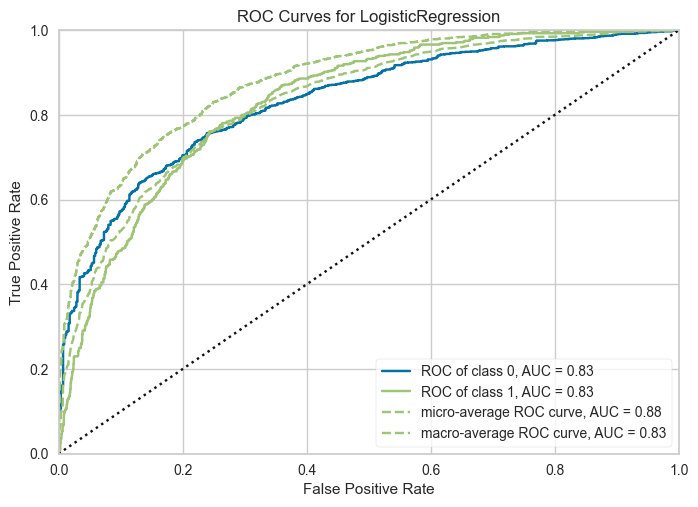

In [18]:
automl.plot_model(best_model)

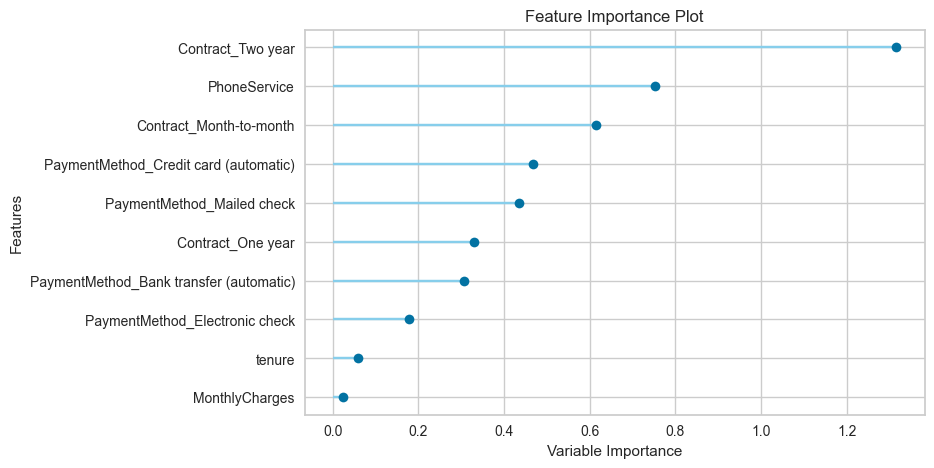

In [19]:
automl.plot_model(best_model, plot = 'feature')

I'm going to create a new churn data to predict the best model.

In [21]:
new_churn_data = df.iloc[-3:-2]

In [22]:
predictions = predict_model(best_model, data=new_churn_data)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
4801-JZAZL,11,No,Month-to-month,Electronic check,29.6,346.450012,No,No,0.5371


## Saving, testing and loading the model
In this part, I'm going to save the model in a pickle file, then I'm going to test, load, and predict the file.

In [24]:
automl.save_model(best_model, 'pyca_data_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

In [25]:
pyca_model = ClassificationExperiment()
tested_model = pyca_model.load_model('pyca_data_model')

Transformation Pipeline and Model Successfully Loaded


In [26]:
new_pyca = ClassificationExperiment()
loaded_model = new_pyca.load_model('pyca_data_model')

Transformation Pipeline and Model Successfully Loaded


In [27]:
new_pyca.predict_model(loaded_model, df.iloc[-3:-2])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
4801-JZAZL,11,No,Month-to-month,Electronic check,29.6,346.450012,No,No,0.5371


## Creating a Python module for predictions

In [29]:
Code('predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    "Load the churn_data.csv data into a DataFrame."
    
    df = pd.read_csv('churn_data.csv', index_col='customerID')
    return df


def make_predictions(df):
    "Use the best model (LogisticRegression) pycaret to make predictions"
    
    classifier = ClassificationExperiment()
    model = classifier.load_model('pyca_data_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename({'Label': 'Churn'}, axis=1, inplace=True)
    predictions['Churn'].replace({1: 'Churn', 0: 'No churn'},
                                                 inplace=True)
    return predictions['Churn']


if __name__ == "__main__":
    df = load_data('churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

Lastly I'm running the file to test it and see the predictions.

In [31]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']


<Figure size 800x550 with 0 Axes>

## References

The following links are references used as resources to complete and improve this project.

#### __[A step-by-step guide to install PyCaret in Python](https://pycaret.gitbook.io/docs/get-started/installation)__

#### __[A Complete Guide to PyCaret!!!](https://accredianpublication.medium.com/a-complete-guide-to-pycaret-c07b1e51f698)__

#### __[Analysis and model explainability functions in PyCaret](https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model)__

#### __[joblib 1.4.2](https://pypi.org/project/joblib/)__

#### FTE_Week_3  __[MSDS600 W3 FTE advanced section](https://www.youtube.com/watch?time_continue=209&v=c4hbVqoAmvA&embeds_referring_euri=https%3A%2F%2Fworldclass.regis.edu%2F&source_ve_path=Mjg2NjY&feature=emb_logo)__


## Summary

I used the pycaret auto ML package to predict if customers are going to churn. I set ‘recall’ as the metric used for finding the best model and it showed ‘Logistic Regression’ as the best one, however, ‘Accuracy’ was the same, and both for all the models had the same result. I trained the model, I plotted the best model and the best model with ‘feature’. <br>
After I estimated the predictions for the new DF, I saved the model to the disk as a pickle file, tested the functions with the new data, and printed the predictions.
